In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
np.random.seed(666)

In [3]:
size = 1000

# Data 1

Straight-forward linear regression

In [4]:
df1 = pd.DataFrame(data = {'x': np.random.normal(3, 1, size)})

In [5]:
df1['y'] = df1['x'] + np.random.normal(size=size)

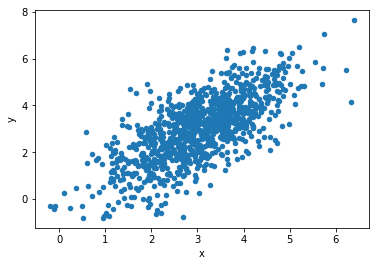

In [6]:
# Inspect
df1.plot('x', 'y', kind='scatter')

In [7]:
# Write out
df1.to_csv('df1.csv', index=False)

# Data 2

Linear regression with elbow change in slope

In [8]:
df2 = pd.DataFrame(data = {'x': np.random.normal(3, 1, size)})

In [9]:
df2['y'] = (
    df2['x'] -
    (df2['x'] > 3) * (df2['x'] - 3) +
    np.random.normal(0, .33, size=size)
)

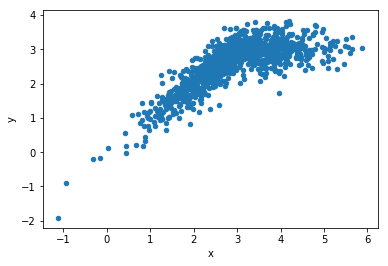

In [10]:
# Inspect
df2.plot('x', 'y', kind='scatter')

In [11]:
# Write out
df2.to_csv('df2.csv', index=False)

# Data 3

Linear regression with discontinuity but same slope

In [12]:
df3 = pd.DataFrame(data = {'x': np.random.normal(3, 1, size)})

In [13]:
df3['y'] = (
    df3['x'] +
    (df3['x'] > 3) * 3 +
    np.random.normal(size=size)
)

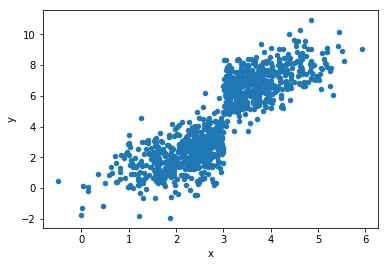

In [14]:
# Inspect
df3.plot('x', 'y', kind='scatter')

In [15]:
# Write out
df3.to_csv('df3.csv', index=False)

# Data 4

Linear regression of a categorical variable

In [16]:
df4 = pd.DataFrame(data = {'x': np.random.choice(['A', 'B'], size, p=[.5, .5])})

In [17]:
df4['y'] = (
    (df4['x'] == 'A') * 0 +
    (df4['x'] == 'B') * 3 +
    np.random.normal(size=size)
)

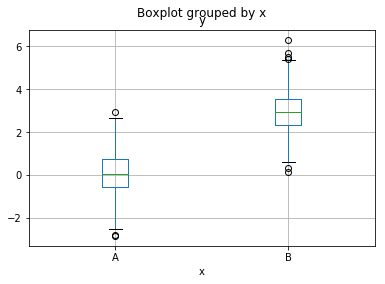

In [18]:
# Inspect
df4.boxplot('y', by='x')

In [19]:
# Write out
df4.to_csv('df4.csv', index=False)

# Data 5

Linear regression of two categorical variables with interaction effects

In [20]:
df5 = pd.DataFrame(data = {
    'x1': np.random.choice(['A1', 'A2'], size, p=[.5, .5]),
    'x2': np.random.choice(['B1', 'B2'], size, p=[.5, .5])
})

In [21]:
df5['y'] = (
    (df5['x1'] == 'A1') * 0 +
    (df5['x1'] == 'A2') * 1 +
    (df5['x2'] == 'B1') * 1 +
    (df5['x2'] == 'B2') * 0 +
    (df5['x1'] == 'A2') * (df5['x2'] == 'B1') * 3 +
    np.random.normal(size=size)
)

C:\Users\Kenneth\Miniconda3\envs\clearbrain_lastresort\lib\site-packages\pandas\core\computation\expressions.py:194: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  op=op_str, alt_op=unsupported[op_str]


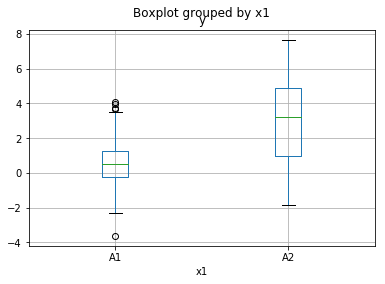

In [22]:
# Inspect x1
df5.boxplot('y', by='x1')

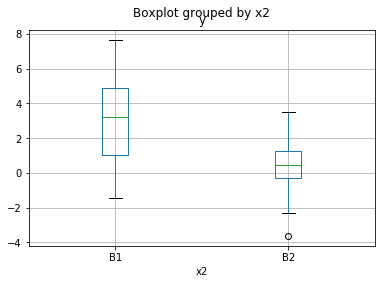

In [23]:
# Inspect x2
df5.boxplot('y', by='x2')

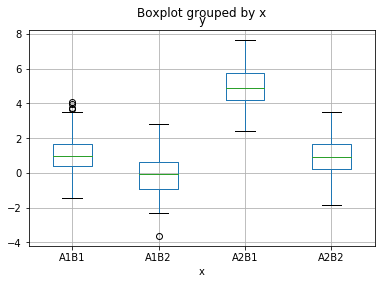

In [24]:
# Inspect interraction
tmp = df5.copy()
tmp['x'] = tmp['x1'] + tmp['x2']
tmp.boxplot('y', by='x')
del tmp

In [25]:
# Write out
df5.to_csv('df5.csv', index=False)

# Data 6

Straight-forward linear regression with some NAs in a numerical variable

In [64]:
size_NA = 100

In [65]:
df6_nonNA = pd.DataFrame(data = {'x': np.random.normal(3, 1, size - size_NA)})
df6_NA = pd.DataFrame(data = {'x': [np.NaN] * size_NA})

In [66]:
df6_nonNA['y'] = (
    df6_nonNA['x'] +
    np.random.normal(size=size - size_NA)
)

df6_NA['y'] = (
    np.random.normal(-1, size=size_NA)
)

In [67]:
df6 = (
    df6_nonNA
    .append(df6_NA)
)

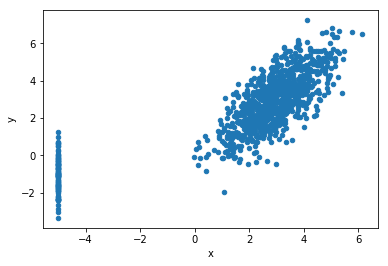

In [68]:
# Inspect
df6.fillna(-5).plot('x', 'y', kind='scatter')

In [75]:
# Write out
df6.sample(frac=1).to_csv('df6.csv', index=False)

In [76]:
# Inspect
pd.read_csv('df6.csv')

,x,y
0,3.345990,0.733130
1,NaN,-1.101590
2,NaN,-0.344626
3,-0.004953,-0.090728
4,4.160029,4.659411
...,...,...
995,2.870707,4.002039
996,2.903551,3.655097
997,1.424587,2.864553
998,1.573996,1.211260


# Data 7

Straight-forward linear regression with some NAs in a categorical variable

In [106]:
df7 = pd.DataFrame(data = {'x': np.random.choice(['A', 'B', ''], size, p=[.45, .45, .1])})

In [107]:
df7['y'] = (
    (df7['x'] == 'A') * 0 +
    (df7['x'] == 'B') * 3 +
    (df7['x'] == '') * -2 +
    np.random.normal(size=size)
)

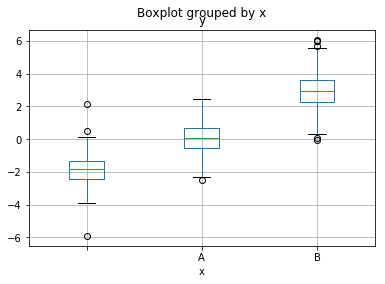

In [108]:
# Inspect
df7.boxplot('y', by='x')

In [109]:
# Write out
df7.to_csv('df7.csv', index=False)

In [114]:
# Inspect
pd.read_csv('df7.csv').head(20)

,x,y
0,A,0.078383
1,B,2.225400
2,A,0.622223
3,B,3.010405
4,B,5.659901
5,A,1.131132
6,B,4.583507
7,B,3.345051
8,A,0.416376
9,B,4.123573


# Data 8

A slice of what is to come!  Numerical + Categorical + Interaction.

In [168]:
df8 = pd.DataFrame(data = {
    'x1': np.random.normal(3, 1, size),
    'x2': np.random.choice(['A', 'B', 'C'], size, p=[.33, .33, .34]),
})

In [172]:
df8['y'] = (
    df8['x1'] +
    (df8['x2'] == 'A') * 2 +
    (df8['x2'] == 'B') * -2 +
    (df8['x2'] == 'C') * -4 +
    (df8['x2'] == 'C') * df8['x1'] * 1.5 +
    np.random.normal(size=size)
)

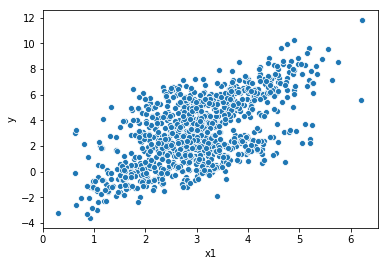

In [173]:
# Inspect
sb.scatterplot(data=df8, x='x1', y='y')

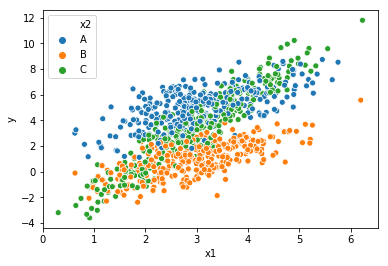

In [174]:
# Inspect by x2 value
sb.scatterplot(data=df8, x='x1', y='y', hue='x2')

In [175]:
# Write out
df8.to_csv('df8.csv', index=False)

In [176]:
# Inspect
pd.read_csv('df8.csv')

,x1,x2,y
0,2.216415,A,4.500620
1,3.429572,B,1.219805
2,2.043036,C,0.698519
3,3.319625,B,0.515603
4,2.297566,C,1.752152
...,...,...,...
995,4.709692,A,6.742609
996,3.665120,A,6.251853
997,1.728169,A,4.952232
998,1.942026,B,1.831416
